# MALIGNANT COMMENTS CLASSIFIER

### PROBLEM STATEMENT

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying

### DATASET  

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’.

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.

The data set includes:

1.Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not.  
2.Highly Malignant: It denotes comments that are highly malignant and hurtful.  
3.Rude: It denotes comments that are very rude and offensive.  
4.Threat: It contains indication of the comments that are giving any threat to someone.  
5.Abuse: It is for comments that are abusive in nature.  
6.Loathe: It describes the comments which are hateful and loathing in nature.  
7.ID: It includes unique Ids associated with each comment text given.  
8.Comment text: This column contains the comments extracted from various social media platforms.

### IMPORTING REQUIRED LIBRARIES

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import re

import nltk
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [14]:
#Read the csv file into dataframe df
df = pd.read_csv("malignant_train.csv")#Importing the training data

test=pd.read_csv("malignant_test.csv")#Importing the test data
print(df.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [15]:
test.head()#test data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [16]:
df.head()#training data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
#List the fields in our dataframe
df.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

### Exploratory Data Analysis

In [18]:
#Checking missing values in train data
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [19]:
#Checking missing values in test data
test.isnull().sum()

id              0
comment_text    0
dtype: int64

**There are no missing values in both the data fortunately.**

### Data Cleaning

1. We are defining a function that replaces all the non alpha characters with space, replacing brackets,  
removing html tags, replacing next line spaces, replacing multiple line spaces, extra spaces and    
for characters like aren't replacing n't with not.  
Finally converting to lower case.

In [20]:
def clean_text(data):
    for i in range(len(df)):
        
        #replacing all non alpha charcaters with space
        data = re.sub('[^a-zA-Z]', ' ',data) 
        
        #replacing brackets
        data = re.sub('\[|\]', ' ', data)  
        
        #removing html tags
        data = re.sub('https?://\S+|www\.\S+', '', data)  
        
        #replacing next line spaces
        data = re.sub('\n', '', data)  
        
        #replacing multiple line spaces and _ with single space bar only
        data = re.sub(' +|_+', ' ', data)   
        
        #for characters like aren't I will replace n't with not
        data = re.sub('n\st',' not',data)  
        
        #lower case
        data = data.lower() 
        return data
    

In [21]:
# Cleaning Train data using above function.
df['comment_text']=df['comment_text'].apply(clean_text)

In [22]:
# Cleaning Test data using above function.
test['comment_text']=test['comment_text'].apply(clean_text)

**Preprocessing train data, tokenizing and Lemmatizing.**

In [23]:
corpus_train = []

def pre_process_train(start,end, data):
    for i in range(start,end):
        review = data['comment_text'][i] 
        #from each row of message only keeping element which starts with albhabet
        review = word_tokenize(review)
        words = []
        for word in review:
            if len(word)>2:
                words.append(word)
        review_length = words
        
        word_lemmatize = []
        for wrd in review_length:
            if wrd not in set(stopwords.words('english')):
                word_lemmatize.append(WordNetLemmatizer().lemmatize(wrd))

        review_lemmatise = word_lemmatize
        review = ' '.join(review_lemmatise)          
        
        corpus_train.append(review)

In [24]:
# Applying function to train data.
pre_process_train(0, 159571, df)

In [25]:
# Length of train data after word tokenizing and lemmatizing.
len(corpus_train)

159571

In [26]:
# Removing irrelevant column for modeling from test data.
test.drop('id', axis = 1, inplace = True)

In [27]:
import json
with open("corpus_train.txt", "w") as fp:
    json.dump(corpus_train, fp)

In [28]:
# Preprocessing test data, tokenizing and Lemmatizing.
corpus_test = []

def pre_process_test(start,end, data):
    for i in range(start,end):
        review = data['comment_text'][i] #from each row of message only keeping element which starts with albhabet
        review = word_tokenize(review)
        words = []
        for word in review:
            if len(word)>2:
                words.append(word)
        review_length = words

        word_lemmatize = []
        for wrd in review_length:
            if wrd not in set(stopwords.words('english')):
                word_lemmatize.append(WordNetLemmatizer().lemmatize(wrd))

        review_lemmatise = word_lemmatize
        review = ' '.join(review_lemmatise)          
        
        corpus_test.append(review)

In [29]:
# Applying function to test data.
pre_process_test(0, 153164, test)

In [30]:
import json
with open("corpus_test.txt", "w") as fp:
    json.dump(corpus_test, fp)

In [31]:
# Saving filtered/cleaned comments to a new variable
clean_comment = pd.DataFrame(corpus_train)

In [32]:
# Reassigning data to clean_comment column.
df['clean_comment'] = clean_comment
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,d aww he matches this background colour i m se...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,000113f07ec002fd,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,more i ca not make any real suggestions on im...,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [33]:
# Deleting id column.
df.drop('id', axis = 1, inplace = True)

In [34]:
# Display first 5 rows.
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,clean_comment
0,explanation why the edits made under my userna...,0,0,0,0,0,0,explanation edits made username hardcore metal...
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,aww match background colour seemingly stuck th...
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,hey man really trying edit war guy constantly ...
3,more i ca not make any real suggestions on im...,0,0,0,0,0,0,make real suggestion improvement wondered sect...
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,sir hero chance remember page


In [35]:
test_clean_comment = pd.DataFrame(corpus_test)

test['clean_comment'] = test_clean_comment
test.head()

,comment_text,clean_comment
0,yo bitch ja rule is more succesful then you ll...,bitch rule succesful ever whats hating sad mof...
1,from rfc the title is fine as it is imo,rfc title fine imo
2,sources zawe ashton on lapland,source zawe ashton lapland
3,if you have a look back at the source the inf...,look back source information updated correct f...
4,i do not anonymously edit articles at all,anonymously edit article


### DATA VISUALIZATION

average length of comment: 374.681


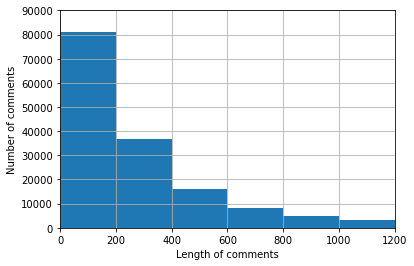

In [37]:
comment = df['comment_text']
comment = comment.values
x = [len(comment[i]) for i in range(comment.shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

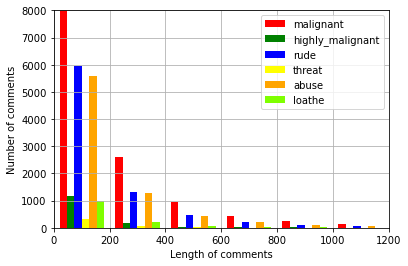

In [39]:
label = df[['malignant','highly_malignant','rude','threat','abuse','loathe']]
label = label.values
y = np.zeros(label.shape)
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

labelsplt = ['malignant','highly_malignant','rude','threat','abuse','loathe']
color = ['red','green','blue','yellow','orange','chartreuse']        
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

**Inference:  
Data with low sentence lengths( <200) are malignant,rude,abuse.**

In [40]:
mal_data = pd.DataFrame(df[df['malignant']==1]['clean_comment'])
high_mal_data = pd.DataFrame(df[df['highly_malignant']==1]['clean_comment'])
rude_data = pd.DataFrame(df[df['rude']==1]['clean_comment'])
threat_data = pd.DataFrame(df[df['threat']==1]['clean_comment'])
abuse_data = pd.DataFrame(df[df['abuse']==1]['clean_comment'])
loathe_data = pd.DataFrame(df[df['loathe']==1]['clean_comment'])

In [41]:
def wordcloud(data,label_type):
    comment_words = ''
    stopwords = set(STOPWORDS)


    for val in data.clean_comment:
      
    # typecast each val to string
        val = str(val)
  
    # split the value
        tokens = val.split()
      
    # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
      
        comment_words += " ".join(tokens)+" "
    
    cloud = WordCloud(width=700,height=500,max_words=50,mode="RGBA",prefer_horizontal=1,collocations=False).generate(comment_words)
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.title("top 50 {} words".format(label_type))
    plt.show()

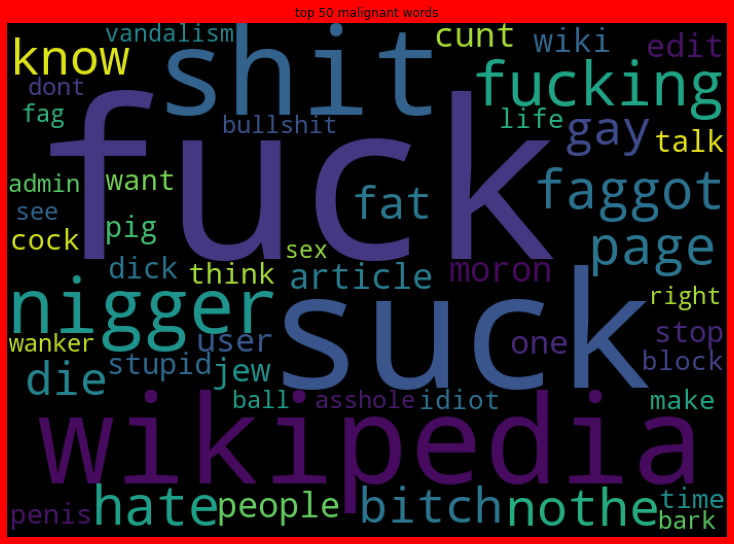

In [42]:
wordcloud(mal_data,'malignant')

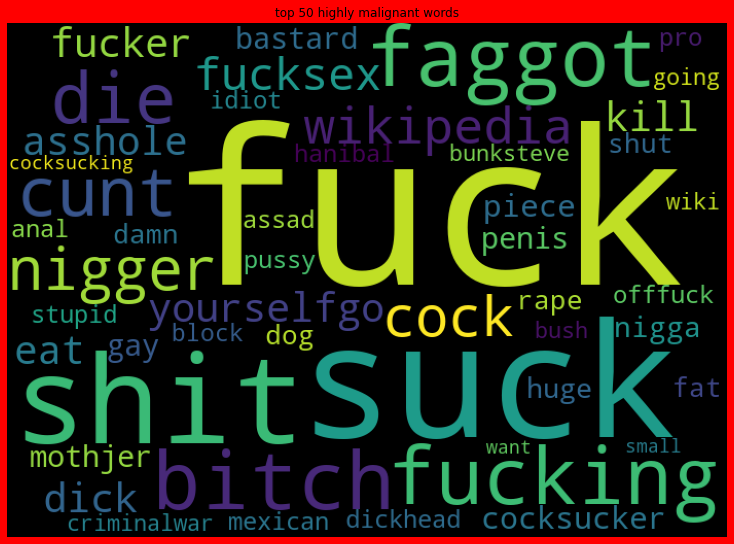

In [43]:
wordcloud(high_mal_data,'highly malignant')

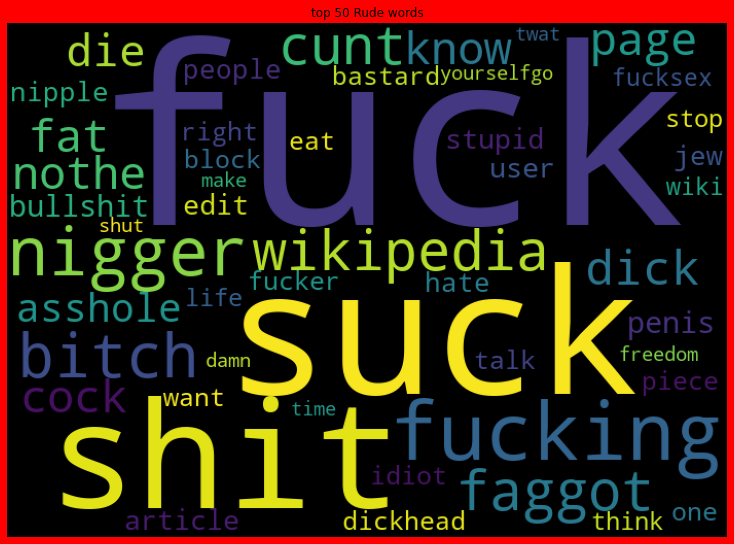

In [44]:
wordcloud(rude_data,'Rude')

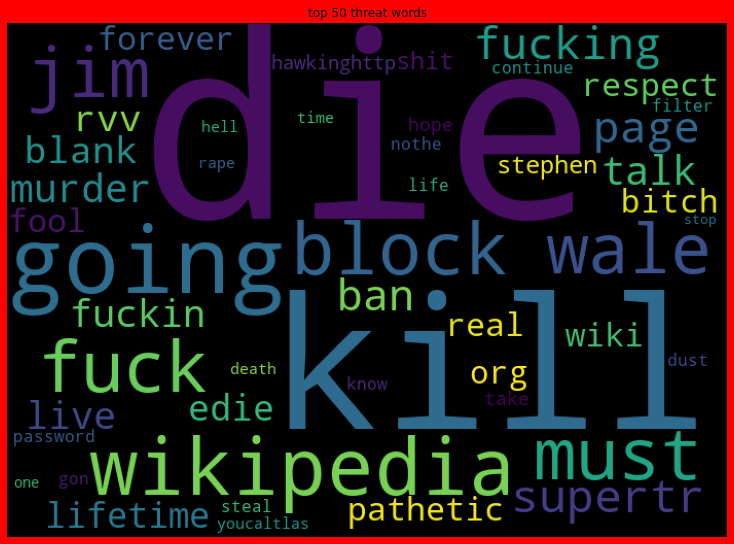

In [45]:
wordcloud(threat_data,'threat')

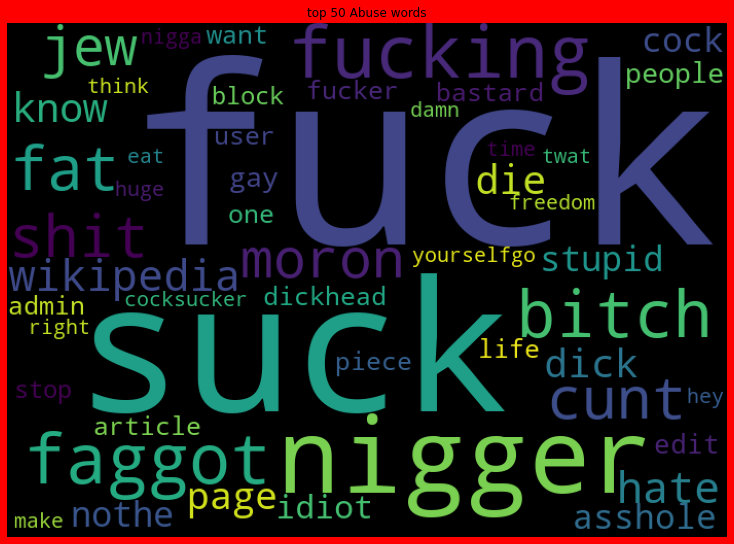

In [46]:
wordcloud(abuse_data,'Abuse')

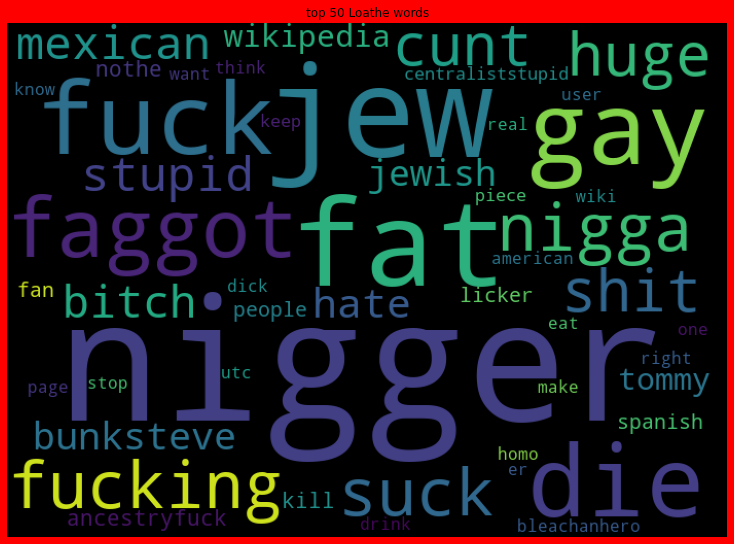

In [47]:
wordcloud(loathe_data,'Loathe')

In [ ]:
#Saving both preprocessed files.
df.to_csv('final_train.csv')
test.to_csv('final_test.csv')